In [110]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math

In [111]:
# array contains all the flowResult files which belongs to this MUD flow
# DUP
all_files = ["AwairAirQuality_70886b100fc6.pcap_numberOfMatches.csv", 
             "LiFXBulb_d073d5018308.pcap_numberOfMatches.csv", 
             "PixStarPhotoFrame_e076d033bb85.pcap_numberOfMatches.csv", 
             "RingDoorBell_884aea31669d.pcap_numberOfMatches.csv", 
             "TPLinkCamera_f4f26D9351f1.pcap_numberOfMatches.csv", 
             "TribySpeaker_18B79E022044.pcap_numberOfMatches.csv", 
             "AmazonEcho/DUP_CONCATANATED_AmazonEcho_44650d56ccd3_numberOfMatches.csv", 
             "NestProtect/DUP_CONCATANATED_NestProtect_18b43025bee4_numberOfMatches.csv",
             "WithingsSleepSensor/DUP_CONCATANATED_WithingsSleepSensor_0024e42028c6_numberOfMatches.csv"
             ]    

In [112]:
# paths of other files
# path = ""
path = "statistics/numberOfMatchesWithPorts/"    

In [113]:
# loading all the files as pandas dataframes
all_dfs = []

for filename in all_files:
    df = pd.read_csv("../../data/" + path + filename)
    all_dfs.append(df)

In [114]:
# Global plot pattern for the entire notebook
# plotPattern = 'scatter'
plotPattern = 'hist'

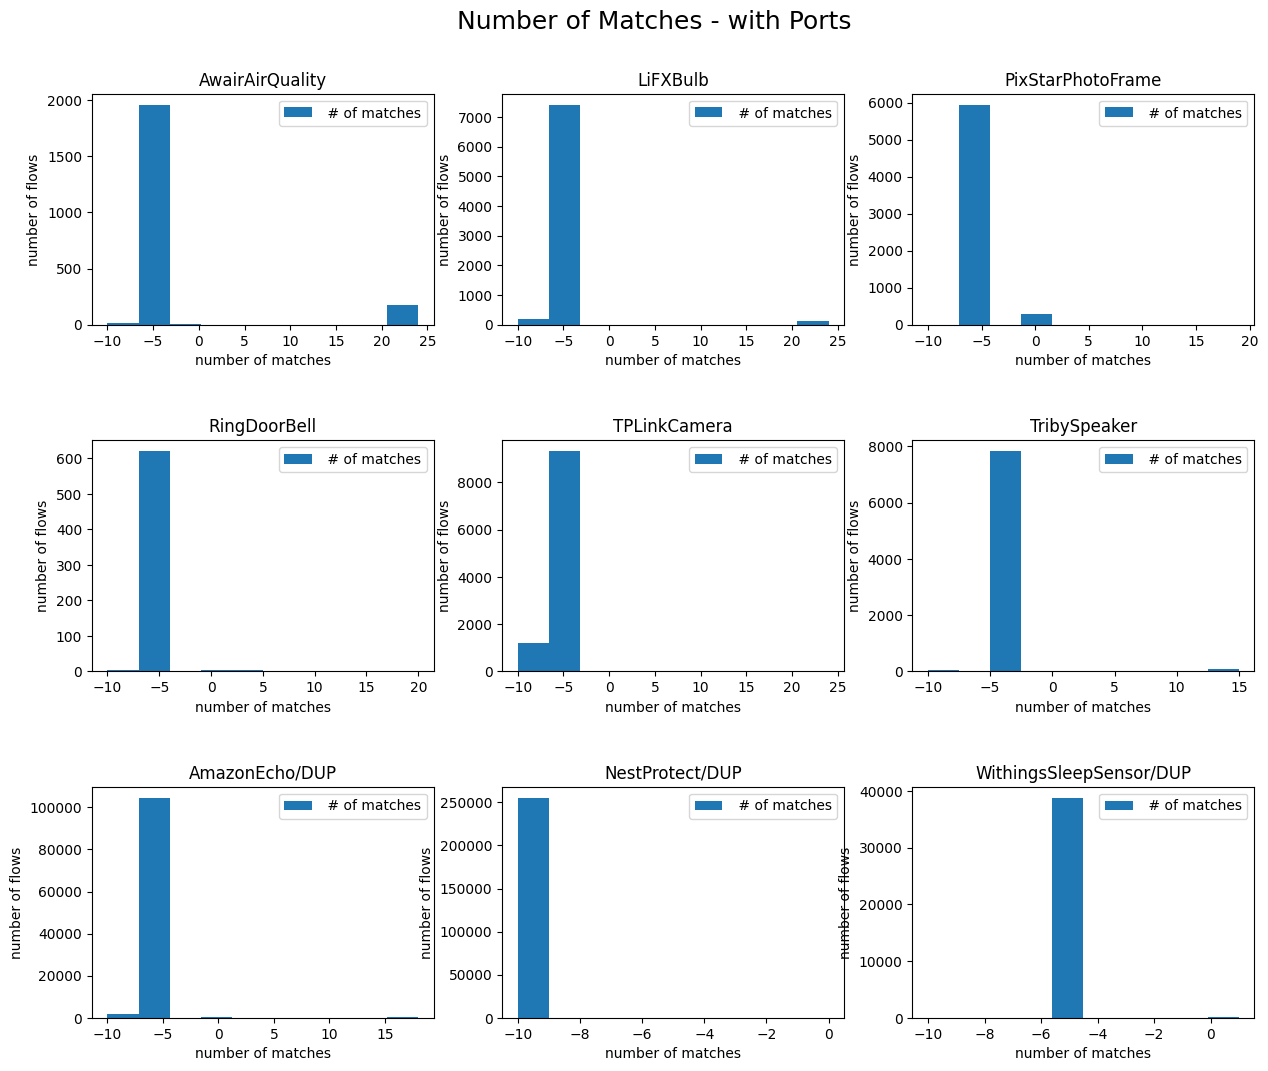

In [115]:
# define subplot grid
plotRows = math.ceil(len(all_dfs) / 3)
plotCols = 3


fig, axs = plt.subplots(nrows=plotRows, ncols=plotCols, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Number of Matches - with Ports", fontsize=18, y=0.95)

pos = 0
for df, ax in zip(all_dfs, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df.plot(ax=ax, x='ipFlow', y=' # of matches', kind=plotPattern)

    if plotPattern == "hist":
        ax.set_xlabel("number of matches")
        ax.set_ylabel("number of flows")

    ax.set_title(all_files[pos].split("_")[0])
    pos+=1
    # chart formatting

plt.show()

#### Concatanating all the dataframes to get a single one for the MUD flow

In [116]:
total_df = pd.concat(all_dfs, axis=0, ignore_index=True)
display(total_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ipFlow         436774 non-null  int64
 1    # of matches  436774 non-null  int64
dtypes: int64(2)
memory usage: 6.7 MB


None

In [117]:
total_df.info()
print(total_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ipFlow         436774 non-null  int64
 1    # of matches  436774 non-null  int64
dtypes: int64(2)
memory usage: 6.7 MB
Index(['ipFlow', ' # of matches'], dtype='object')


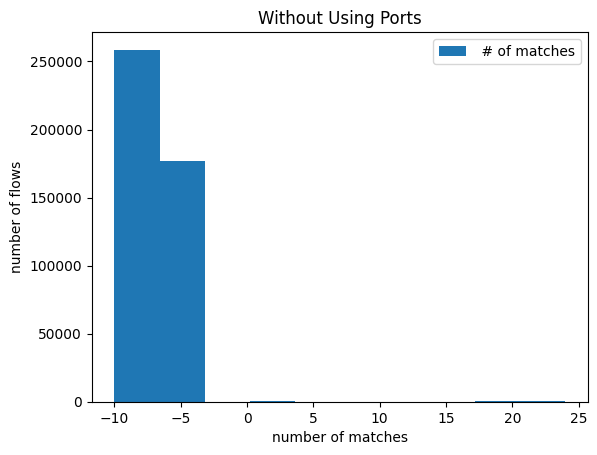

In [118]:
if plotPattern == "hist":
    ax = total_df.plot(x='ipFlow', y=' # of matches', kind=plotPattern, title="Without Using Ports")
    ax.set_xlabel("number of matches")
    ax.set_ylabel("number of flows")
else:
    ax = total_df.plot(x='ipFlow', y=' # of matches', kind=plotPattern, title="Without Using Ports")
